# Heart Disease Prediction Analysis
- Reading and Understanding Data
- Cleaning The Data
- Handle Outliers
- Feature engineering(Create different age_group ,Labels)
- Exploratory Data Analysis(Visualisation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart = pd.read_csv(r"C:\\Users\\kumar\\OneDrive\\Desktop\\heart.csv")
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.shape

(303, 14)

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


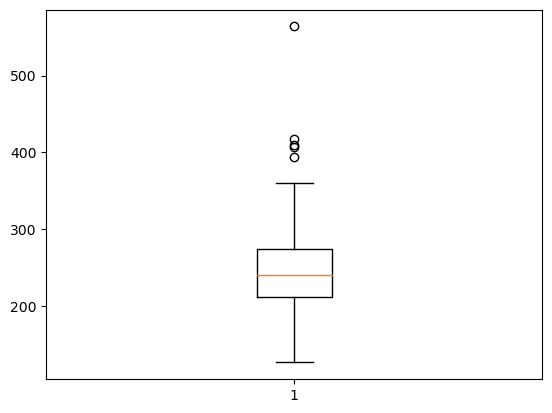

In [6]:
plt.boxplot(heart.chol)
plt.show()

In [7]:
filter_data = heart[heart['chol'] < 300]

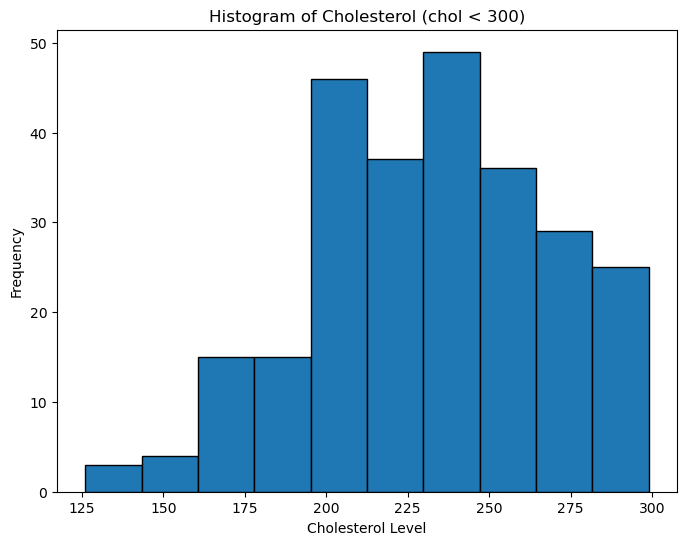

In [8]:
import matplotlib.pyplot as plt

# Plotting a histogram of 'chol' from filter_data

plt.figure(figsize=(8, 6))
plt.hist(filter_data['chol'], bins=10, edgecolor='black')
plt.title('Histogram of Cholesterol (chol < 300)')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.show()

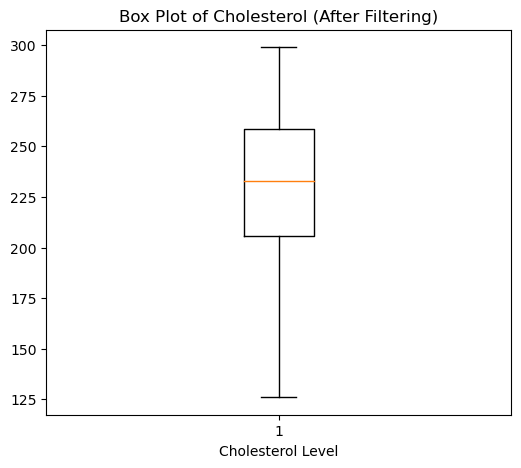

In [9]:
# Box plot of 'chol' after filtering

plt.figure(figsize=(6, 5))
plt.boxplot(filter_data['chol']) 
plt.title('Box Plot of Cholesterol (After Filtering)')
plt.xlabel('Cholesterol Level')
plt.show()


In [10]:
heart["age"].mean()

54.366336633663366

In [11]:
heart["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

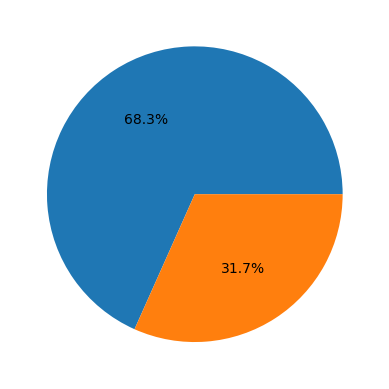

In [12]:
plt.pie(heart["sex"].value_counts(),autopct='%1.1f%%')
plt.show()

In [13]:
trtbps_counts = heart["trtbps"].value_counts()

In [14]:
values_to_keep = trtbps_counts[trtbps_counts >= 4].index

In [15]:
filtered_heart = heart[heart['trtbps'].isin(values_to_keep)]

In [16]:
filtered_heart["trtbps"].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
145     5
134     5
100     4
122     4
170     4
Name: trtbps, dtype: int64

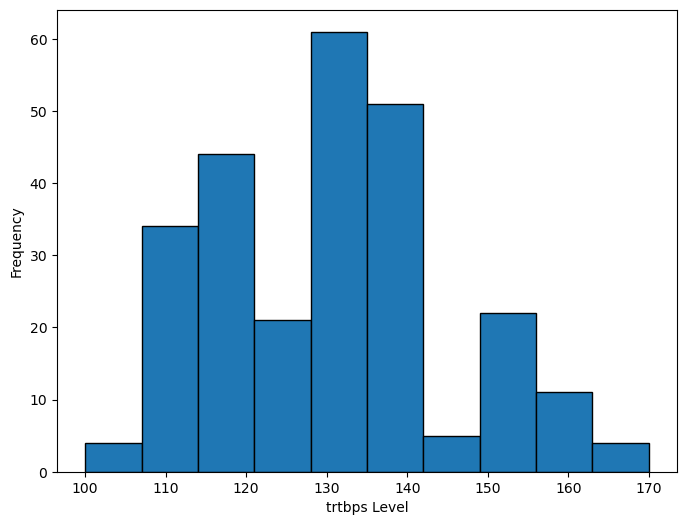

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(filtered_heart['trtbps'], bins=10, edgecolor='black')
plt.xlabel('trtbps Level')
plt.ylabel('Frequency')
plt.show()

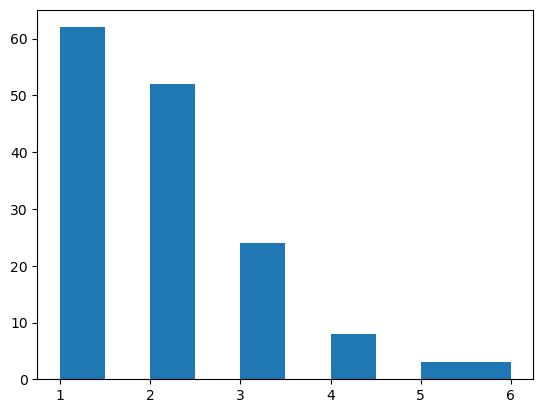

In [18]:
plt.hist(heart["chol"].value_counts())
plt.show()

In [19]:
heart.groupby("sex")["output"].mean()

sex
0    0.750000
1    0.449275
Name: output, dtype: float64

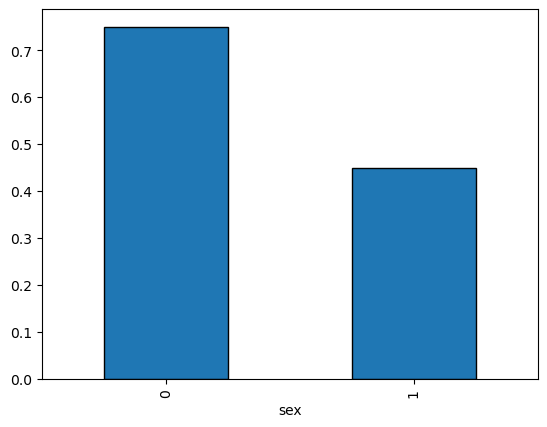

In [20]:
heart.groupby("sex")["output"].mean().plot.bar(edgecolor = "black")
plt.show()

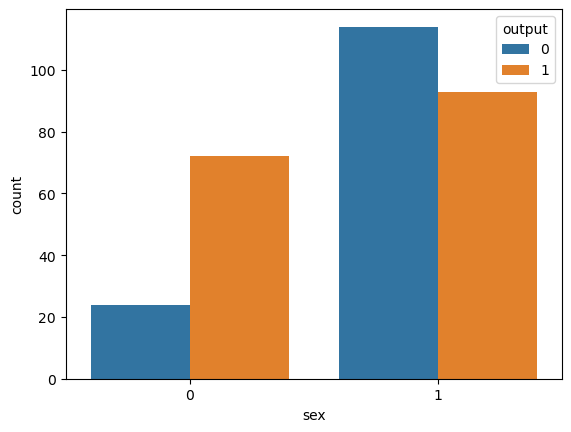

In [21]:
sns.countplot(x='sex', hue='output', data=heart)
plt.show()


In [22]:
heart['age_category'] = pd.cut(heart['age'], bins=[0,40, 60, 80], labels=['<40', '40-60', '60+'])

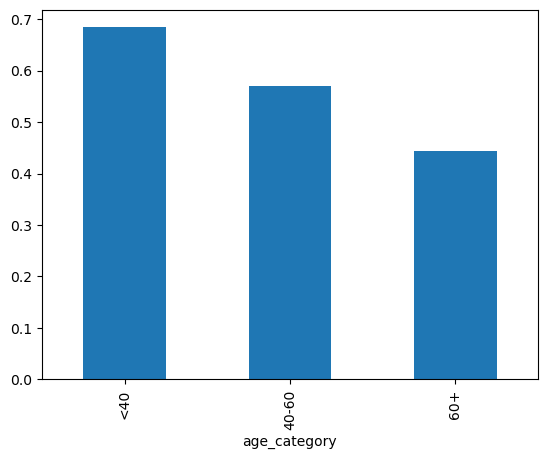

In [23]:
heart.groupby("age_category")["output"].mean().plot.bar()
plt.show()

In [24]:
heart.groupby("age_category")["output"].mean()*100

age_category
<40      68.421053
40-60    57.073171
60+      44.303797
Name: output, dtype: float64

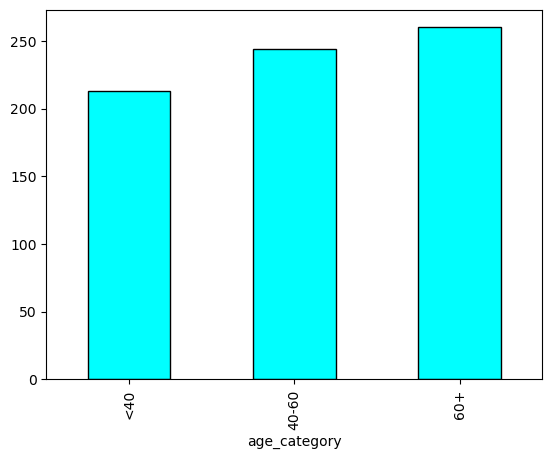

In [25]:
heart.groupby("age_category")["chol"].mean().plot.bar(color = "cyan",edgecolor = "black")
plt.show()

In [26]:
heart.groupby("sex")["output"].mean()

sex
0    0.750000
1    0.449275
Name: output, dtype: float64

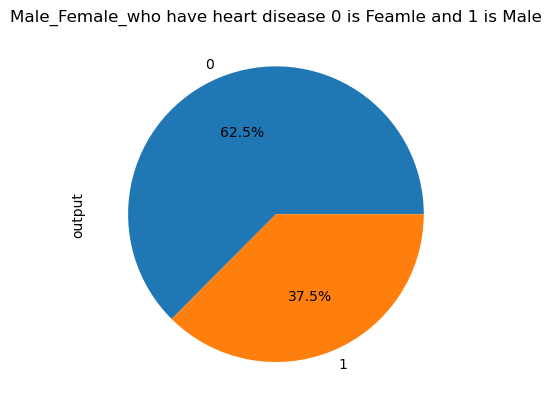

In [27]:
heart.groupby("sex")["output"].mean().plot.pie(autopct = "%1.1f%%")
plt.title("Male_Female_who have heart disease 0 is Feamle and 1 is Male")
plt.show()

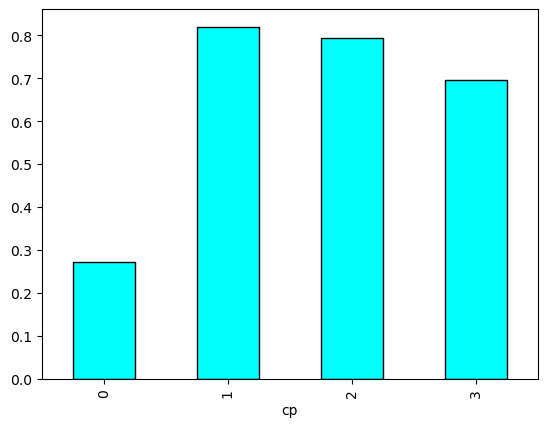

In [28]:
heart.groupby("cp")["output"].mean().plot.bar(color = "cyan",edgecolor = "black")
plt.show()

In [29]:
heart.groupby("cp")["chol"].mean()

cp
0    250.132867
1    244.780000
2    243.172414
3    237.130435
Name: chol, dtype: float64

In [30]:
heart.groupby("cp")["chol"].quantile(0.75)

cp
0    284.5
1    278.5
2    267.5
3    267.0
Name: chol, dtype: float64

In [31]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'age_category'],
      dtype='object')

In [32]:
heart.groupby("age_category")["oldpeak"].mean()*100

age_category
<40       82.105263
40-60     93.951220
60+      135.189873
Name: oldpeak, dtype: float64

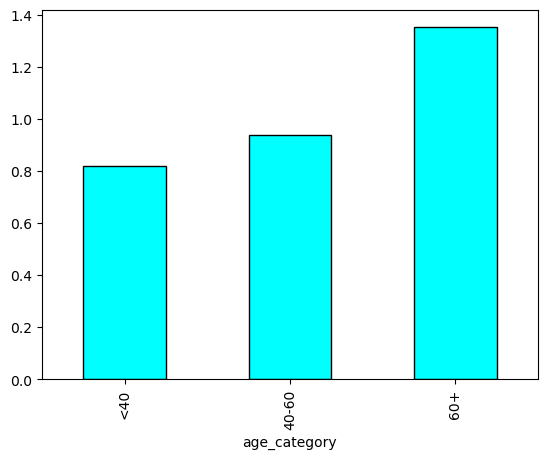

In [43]:
heart.groupby("age_category")["oldpeak"].mean().plot.bar(color = "cyan",edgecolor = "black")
plt.show()

In [51]:
heart.groupby("age_category")["output"].mean()

age_category
<40      0.684211
40-60    0.570732
60+      0.443038
Name: output, dtype: float64

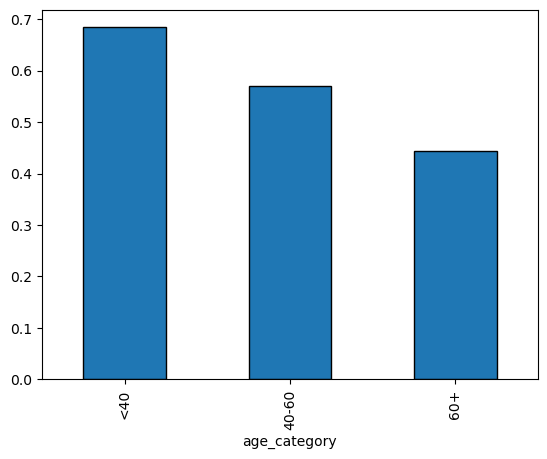

In [55]:
heart.groupby("age_category")["output"].mean().plot.bar(edgecolor = "black")
plt.show()

In [60]:
heart = heart.drop(["age_category"],axis = 1)

# Logistic Regression Model for predicting Heart_disease

In [56]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [61]:
X = heart.drop(["output"],axis = 1)
y = heart["output"]

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 100)

In [63]:
logml = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 output   No. Observations:                  212
Model:                            GLM   Df Residuals:                      198
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -78.421
Date:                Sun, 30 Jun 2024   Deviance:                       156.84
Time:                        12:02:26   Pearson chi2:                     211.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4669
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9923      3.005      0.996      0.319      -2.898       8.882
age            0.0113      0.027      0.419      0.675      -0.042       0.064
sex           -1.5996      0.531     -3.013      0.003      -2.640      -0.559
cp             0.7635      0.211      3.622      0.000       0.350       1.177
trtbps        -0.0112      0.012     -0.921      0.357      -0.035       0.013
chol          -0.0068      0.005     -1.376      0.169      -0.017       0.003
fbs           -0.4694      0.614     -0.765      0.444      -1.672       0.733
restecg        0.2266      0.427      0.530      0.596      -0.611       1.064
thalachh       0.0211      0.011      1.848      0.065      -0.001       0.044
exng          -0.4430      0.477     -0.929      0.353      -1.378       0.492
oldpeak       -0.5242      0.248     -2.115      0.034      -1.010      -0.038
slp            0.6705      0.422      1.588      0.112      -0.157       1.498
caa           -0.8860      0.238     -3.723      0.000      -1.352      -0.420
thall         -1.1807      0.343     -3.443      0.001      -1.853      -0.509
==============================================================================
"""

In [35]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")

In [67]:
rfe = RFE(logr)
rfe = rfe.fit(X_train,y_train)

In [68]:
rfe.support_

array([False,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True])

In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', False, 6),
 ('sex', True, 1),
 ('cp', True, 1),
 ('trtbps', False, 7),
 ('chol', False, 8),
 ('fbs', False, 3),
 ('restecg', False, 4),
 ('thalachh', False, 5),
 ('exng', False, 2),
 ('oldpeak', True, 1),
 ('slp', True, 1),
 ('caa', True, 1),
 ('thall', True, 1)]

In [70]:
col = X_train.columns[rfe.support_]

In [71]:
X_train.columns[~rfe.support_]

Index(['age', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng'], dtype='object')

## Logistic Regression Model after RFE

In [72]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 output   No. Observations:                  212
Model:                            GLM   Df Residuals:                      205
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -83.074
Date:                Sun, 30 Jun 2024   Deviance:                       166.15
Time:                        12:09:16   Pearson chi2:                     242.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4429
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9794      1.004      2.967      0.003       1.012       4.947
sex           -1.4132      0.477     -2.960      0.003      -2.349      -0.477
cp             0.8491      0.191      4.450      0.000       0.475       1.223
oldpeak       -0.5735      0.242     -2.370      0.018      -1.048      -0.099
slp            0.9255      0.408      2.269      0.023       0.126       1.725
caa           -0.8887      0.224     -3.966      0.000      -1.328      -0.449
thall         -1.1564      0.325     -3.560      0.000      -1.793      -0.520
==============================================================================
"""

### Checking VIF

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif = pd.DataFrame()
vif["Feature"] = X_train_sm.columns
vif["VIF"] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Feature,VIF
0,const,29.18
3,oldpeak,1.63
4,slp,1.51
6,thall,1.17
5,caa,1.09
1,sex,1.08
2,cp,1.05


In [81]:
X_test_sm = sm.add_constant(X_test[col])

In [92]:
y_pred_proba = res.predict(X_test_sm)  # Predicted probabilities
y_pred = (y_pred_proba > 0.5).astype(int)# Predicted classes (assuming threshold of 0.5)

In [85]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8461538461538461

In [87]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
precision

0.8297872340425532

In [88]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.8666666666666667

# Diabetes Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [99]:
diabetes = pd.read_csv(r"C:\\Users\\kumar\\OneDrive\\Desktop\\diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [101]:
diabetes.shape

(768, 9)

In [102]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


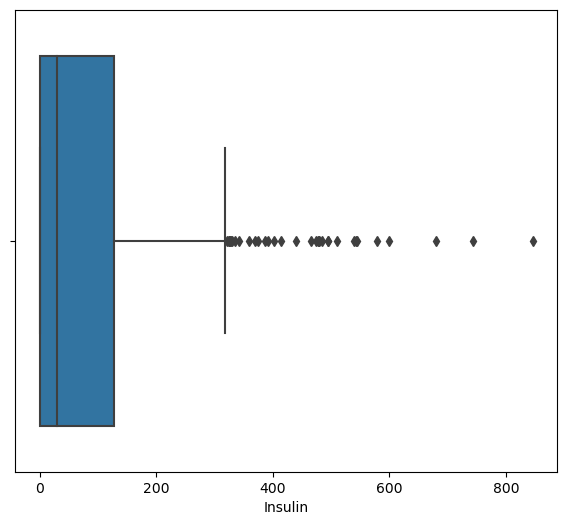

In [103]:
plt.figure(figsize = (7,6))

sns.boxplot(x = diabetes["Insulin"])
plt.show()

In [104]:
diabetes_filter = diabetes[diabetes["Insulin"]<= 600]

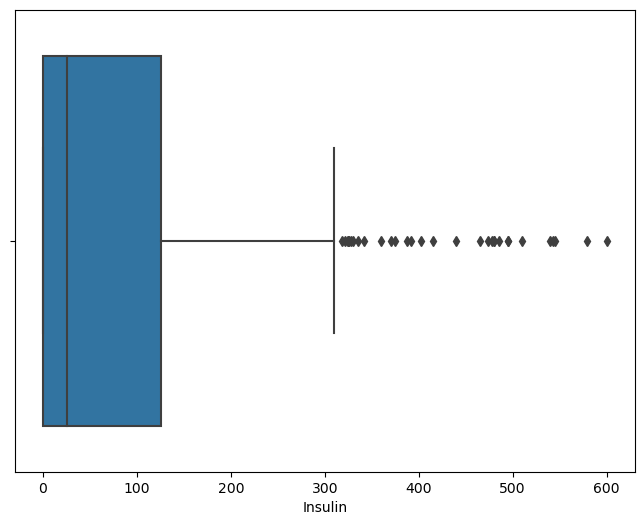

In [105]:
plt.figure(figsize = (8,6))

sns.boxplot(x = diabetes_filter["Insulin"])
plt.show()

In [106]:
diabetes_filter.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,3.853595,120.648366,69.088889,20.492810,77.145098,31.962353,0.469604,33.223529,0.349020
std,3.371734,31.780547,19.376200,15.962866,107.279598,7.863185,0.325085,11.740250,0.476972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,25.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,600.000000,67.100000,2.420000,81.000000,1.000000


In [107]:
diabetes_filter["Pregnancies"].value_counts()

1     134
0     110
2     103
3      75
4      67
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

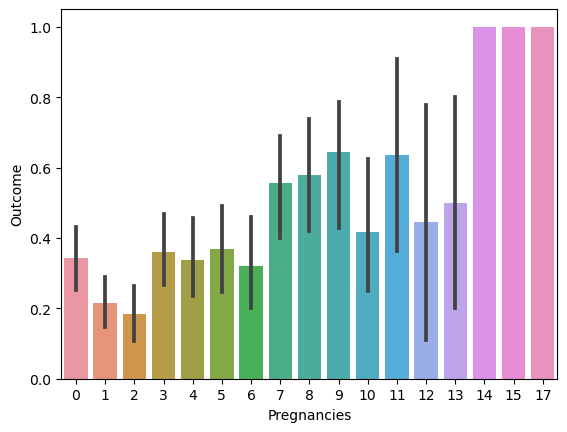

In [108]:
sns.barplot(x = "Pregnancies", y = "Outcome",data = diabetes)
plt.show()

#### We found that those Female which are 10-17 times preganat in lifetime have higher chance of Diabetes

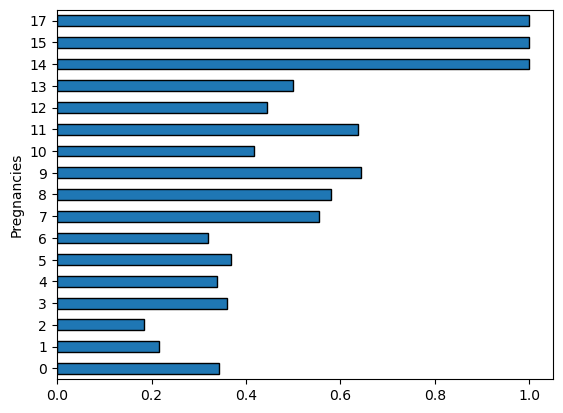

In [109]:
diabetes.groupby("Pregnancies")["Outcome"].mean().plot.barh(edgecolor = "black")
plt.show()

In [110]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [111]:
diabetes_filtered["BloodPressure"].value_counts()

70    57
74    52
68    45
78    45
72    44
64    43
80    40
76    39
60    37
0     35
62    34
82    30
66    30
88    25
84    23
90    22
86    21
58    21
50    13
56    12
54    11
52    11
75     8
92     8
65     7
85     6
94     6
Name: BloodPressure, dtype: int64

In [112]:
diabetes_filtered = diabetes[diabetes['BloodPressure'].
                             map(diabetes['BloodPressure'].value_counts()) >   5]


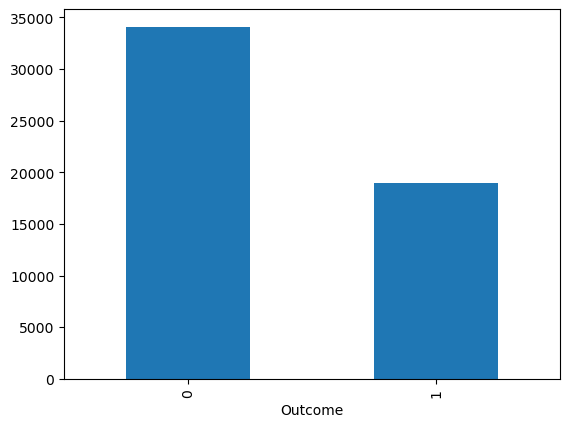

In [113]:
diabetes.groupby("Outcome")["BloodPressure"].sum().plot.bar()
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Outcome'>

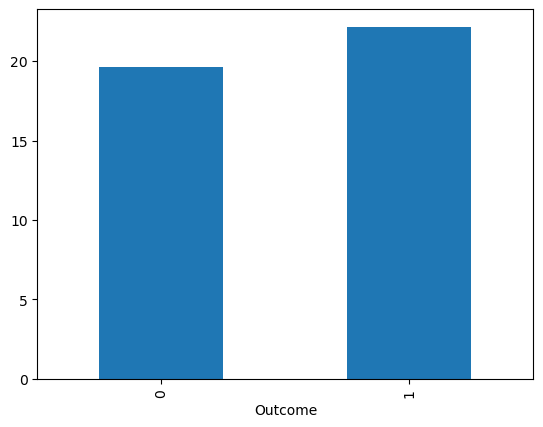

In [114]:
diabetes.groupby("Outcome")["SkinThickness"].mean().plot.bar()

<Axes: xlabel='Outcome'>

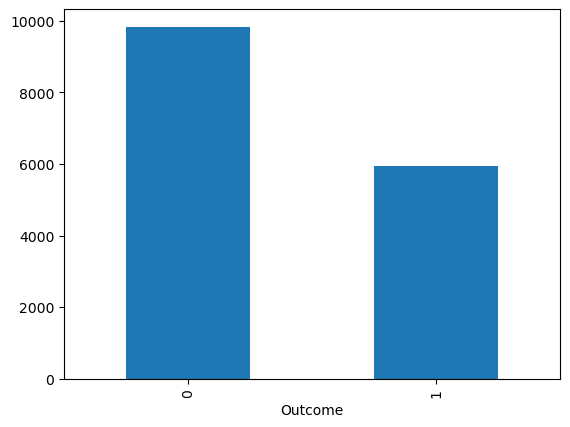

In [115]:
diabetes.groupby("Outcome")["SkinThickness"].sum().plot.bar()

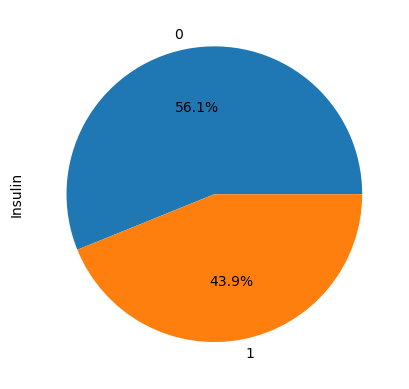

In [116]:
diabetes.groupby("Outcome")["Insulin"].sum().plot.pie(autopct = '%.1f%%')
plt.show()

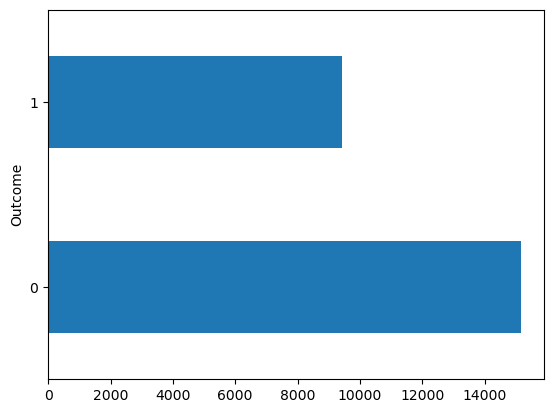

In [117]:
diabetes.groupby("Outcome")["BMI"].sum().plot.barh()
plt.show()

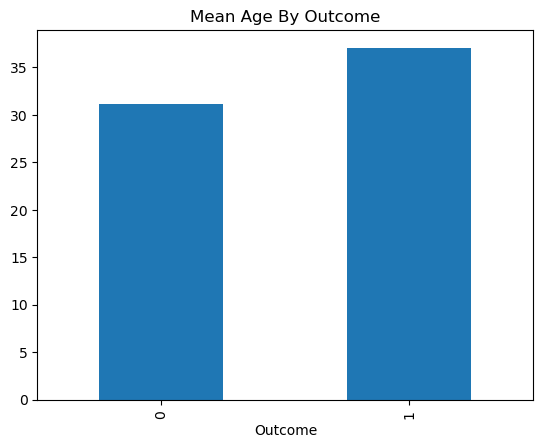

In [118]:
diabetes.groupby("Outcome")["Age"].mean().plot.bar()
plt.title("Mean Age By Outcome")
plt.show()

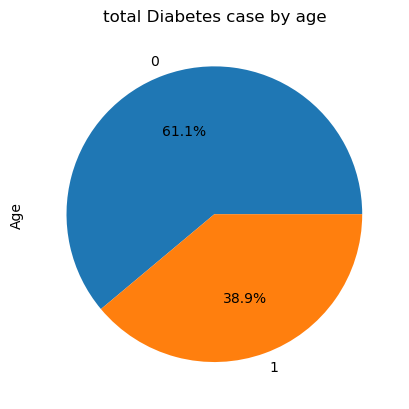

In [119]:
diabetes.groupby("Outcome")["Age"].sum().plot.pie(autopct = "%.1f%%")
plt.title("total Diabetes case by age",color = "Black")
plt.show()

## Putting Feature variable to X

In [120]:
X = diabetes.drop(["Outcome"],axis = 1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## Putting responce to y

In [121]:
y = diabetes["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Split Data into train and test [Training_size] = 70%

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 100)

### Look at correlation

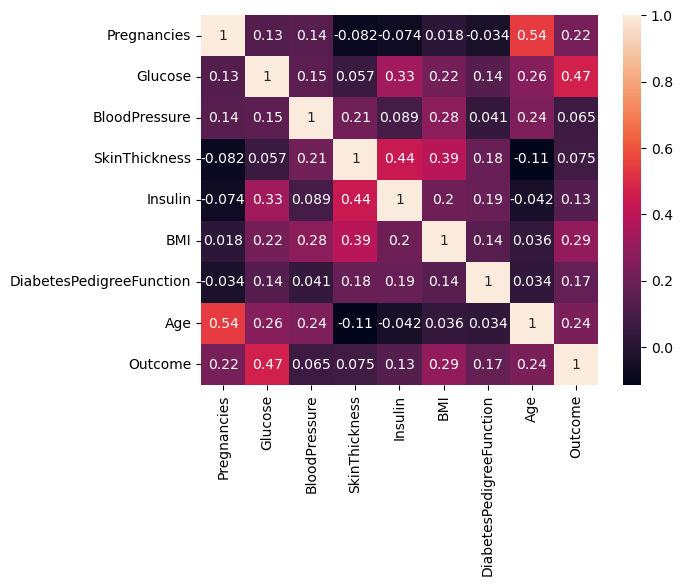

In [123]:
sns.heatmap(diabetes.corr(),annot = True)
plt.show()

In [124]:
X_train = X_train.drop(["SkinThickness","BMI","Glucose"],axis = 1)
X_test = X_test.drop(["SkinThickness","BMI","Glucose"],axis = 1)

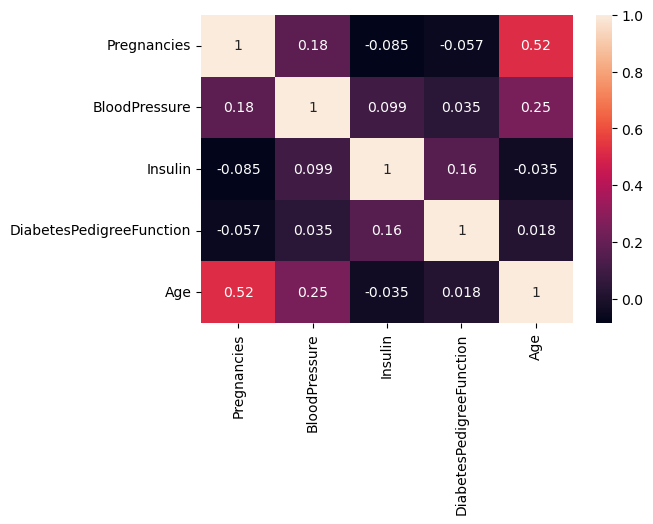

In [125]:
plt.figure(figsize = (6,4))

sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Bulding Our LogisticRegression Model

In [126]:
logml = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())

logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                            GLM   Df Residuals:                      531
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -312.05
Date:                Thu, 18 Jul 2024   Deviance:                       624.11
Time:                        20:08:06   Pearson chi2:                     552.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1223
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.0693      0.455     -6.749      0.000      -3.961      -2.178
Pregnancies                  0.0961      0.034      2.847      0.004       0.030       0.162
BloodPressure                0.0024      0.005      0.459      0.647      -0.008       0.013
Insulin                      0.0026      0.001      3.062      0.002       0.001       0.004
DiabetesPedigreeFunction     1.2957      0.300      4.315      0.000       0.707       1.884
Age                          0.0317      0.010      3.297      0.001       0.013       0.051
============================================================================================
"""

# Feature Selection using RFE

In [127]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
from sklearn.feature_selection import RFE


rfe = RFE(logreg, n_features_to_select=10)
ref = rfe.fit(X_train,y_train)

In [128]:
rfe.support_

array([ True,  True,  True,  True,  True])

In [129]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Pregnancies', True, 1),
 ('BloodPressure', True, 1),
 ('Insulin', True, 1),
 ('DiabetesPedigreeFunction', True, 1),
 ('Age', True, 1)]

In [130]:
col = X_train.columns[rfe.support_]

In [131]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

### assessing The model with Stats_model

In [132]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                            GLM   Df Residuals:                      531
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -312.05
Date:                Thu, 18 Jul 2024   Deviance:                       624.11
Time:                        20:08:08   Pearson chi2:                     552.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1223
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.0693      0.455     -6.749      0.000      -3.961      -2.178
Pregnancies                  0.0961      0.034      2.847      0.004       0.030       0.162
BloodPressure                0.0024      0.005      0.459      0.647      -0.008       0.013
Insulin                      0.0026      0.001      3.062      0.002       0.001       0.004
DiabetesPedigreeFunction     1.2957      0.300      4.315      0.000       0.707       1.884
Age                          0.0317      0.010      3.297      0.001       0.013       0.051
============================================================================================
"""

In [133]:
y_train_pred = res.predict(X_train_sm)

y_train_pred.head(10)

155    0.353389
150    0.271757
78     0.130736
9      0.486609
142    0.185828
321    0.174651
580    0.153937
75     0.121603
29     0.326676
169    0.310299
dtype: float64

In [134]:
Y_train_pred_final = pd.DataFrame({"Outcome":y_train.values,"Outcome_prob":y_train_pred})
Y_train_pred_final["ID"] = y_train.index
Y_train_pred_final.head()

,Outcome,Outcome_prob,ID
155,1,0.353389,155
150,0,0.271757,150
78,1,0.130736,78
9,1,0.486609,9
142,0,0.185828,142


### Making Group For Outcome

In [137]:
Y_train_pred_final["Predicted"] = Y_train_pred_final.Outcome_prob.map(lambda x: 1 if x > 0.5 else 0)

Y_train_pred_final.head()

,Outcome,Outcome_prob,ID,Predicted
155,1,0.353389,155,0
150,0,0.271757,150,0
78,1,0.130736,78,0
9,1,0.486609,9,0
142,0,0.185828,142,0


In [138]:
from sklearn import metrics

confusion = metrics.confusion_matrix(Y_train_pred_final.Outcome,Y_train_pred_final.Predicted)
confusion

array([[309,  41],
       [122,  65]], dtype=int64)

In [139]:
print(metrics.accuracy_score(Y_train_pred_final.Outcome,Y_train_pred_final.Predicted))

0.6964618249534451


In [140]:
vif = pd.DataFrame()
vif["Feature"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Feature,VIF
4,Age,10.32
1,BloodPressure,8.36
0,Pregnancies,3.22
3,DiabetesPedigreeFunction,2.79
2,Insulin,1.49


In [141]:
X = X_train[col].drop(["Age"],axis = 1)

In [142]:
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Feature,VIF
1,BloodPressure,4.27
3,DiabetesPedigreeFunction,2.67
0,Pregnancies,2.37
2,Insulin,1.49
